In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt

columns = ["Algorithm", "Mean PKG", "Mean CPU", "N/A", "N/A", "Time"]
folders = ["C", "Java", "Java-GraalVM", "JavaScript", "Python", "Rust"]
dataframes = {}

for folder in folders:
    file_path = os.path.join(folder, f"{folder}.csv")
    with open(file_path) as file:
        if folder == "Java":
            data = file.readlines()[1:]
            data = ''.join(data).replace(';',',')
        else:
            data = file.read().replace(';',',')
        data = ','.join(columns) + '\n' + data

        new_file_path = os.path.join(folder, f"{folder}_result.csv")
        with open(new_file_path, 'w') as new_file:
            new_file.write(data)

In [25]:
for folder in folders:
    file_path = os.path.join(folder, f"{folder}_result.csv")
    with open(file_path) as file:
        df = pd.read_csv(file_path, sep=',', dtype={col: 'float32' for col in range(1, 3)})  # Colonnes 1, 2 et 3 comme float32

        dataframes[folder] = df

In [26]:
mean_values = {}
sigma_values = {}

for folder, df in dataframes.items():
    mean_time_df = df.groupby("Algorithm")["Time"].mean()
    mean_cpu_df = df.groupby("Algorithm")["Mean CPU"].mean()

    mean_values[folder] = {}
    mean_values[folder]["Time"] = mean_time_df
    mean_values[folder]["Mean CPU"] = mean_cpu_df

    sigma_time_df = df.groupby("Algorithm")["Time"].std().astype("float32")
    sigma_cpu_df = df.groupby("Algorithm")["Mean CPU"].std().astype("float32")

    sigma_values[folder] = {}
    sigma_values[folder]["Sigma Time"] = sigma_time_df
    sigma_values[folder]["Sigma CPU"] = sigma_cpu_df

sigma_values

{'C': {'Sigma Time': Algorithm
  binary-trees        10.046383
  fannkuch-redux     101.513542
  mandelbrot           4.173754
  pidigits             7.222633
  spectral-norm       41.162102
  Name: Time, dtype: float32,
  'Sigma CPU': Algorithm
  binary-trees       1.026574
  fannkuch-redux     8.759592
  mandelbrot         1.335871
  pidigits           0.687076
  spectral-norm      1.779678
  Name: Mean CPU, dtype: float32},
 'Java': {'Sigma Time': Algorithm
  binary-trees        29.343115
  fannkuch-redux     239.970398
  mandelbrot          27.706865
  spectral-norm        4.730514
  Name: Time, dtype: float32,
  'Sigma CPU': Algorithm
  binary-trees        1.964803
  fannkuch-redux     18.986305
  mandelbrot          1.487746
  spectral-norm       0.222101
  Name: Mean CPU, dtype: float32},
 'Java-GraalVM': {'Sigma Time': Algorithm
  binary-trees       58.034382
  fannkuch-redux     77.265221
  mandelbrot         25.192326
  spectral-norm      35.687302
  Name: Time, dtype: float3

In [27]:
with open('paper_results.csv') as file:
    paper_df = pd.read_csv(file, sep=',', dtype={col: 'float32' for col in range(2, 4)})

In [28]:
def plot_results(our_key, paper_key, df):

    diff = {}

    for language in paper_df.groupby("Language").groups.keys():
        print(f"Language: {language}")
        print(f"Difference in {our_key} between paper and our results")

        diff[language] = {}
        diff[language][our_key] = {}

        for algorithm in df[language][our_key].keys():

            diff[language][our_key][algorithm] = {}

            our_value = df[language][our_key][algorithm]
            paper_value = paper_df[(paper_df['Language'] == language) & (paper_df['Algorithm'] == algorithm)][paper_key].values[0]

            print(f"   Algorithm: {algorithm}")
            print(f"      Our mean: {our_value}")
            print(f"      Paper mean: {paper_value}")
            print(f"      Difference: {our_value - paper_value}")

            diff[language][our_key][algorithm] = 100 * (our_value - paper_value)/paper_value

        fig, ax = plt.subplots(figsize=(10, 6))

        our_times = [df[language][our_key][algorithm] for algorithm in df[language][our_key].keys()]
        paper_times = [paper_df[(paper_df['Language'] == language) & (paper_df['Algorithm'] == algorithm)][paper_key].values[0] for algorithm in df[language][our_key].keys()]
        algorithms = list(df[language][our_key].keys())

        ax.bar(algorithms, our_times, width=0.4, label='Our Results', align='center')
        ax.bar(algorithms, paper_times, width=0.4, label='Paper Results', align='edge')

        ax.set_xlabel('Algorithm')
        ax.set_ylabel(our_key)
        ax.set_title(f'Comparison of {our_key} for {language}')
        ax.legend()

        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()


Language: C
Difference in Time between paper and our results
   Algorithm: binary-trees 
      Our mean: 841.7207000000001
      Paper mean: 1125
      Difference: -283.2792999999999
   Algorithm: fannkuch-redux 
      Our mean: 4330.302000000001
      Paper mean: 6076
      Difference: -1745.6979999999994
   Algorithm: mandelbrot 
      Our mean: 760.6239
      Paper mean: 1142
      Difference: -381.37609999999995
   Algorithm: pidigits 
      Our mean: 536.6787
      Paper mean: 546
      Difference: -9.321299999999951
   Algorithm: spectral-norm 
      Our mean: 223.5433
      Paper mean: 677
      Difference: -453.4567


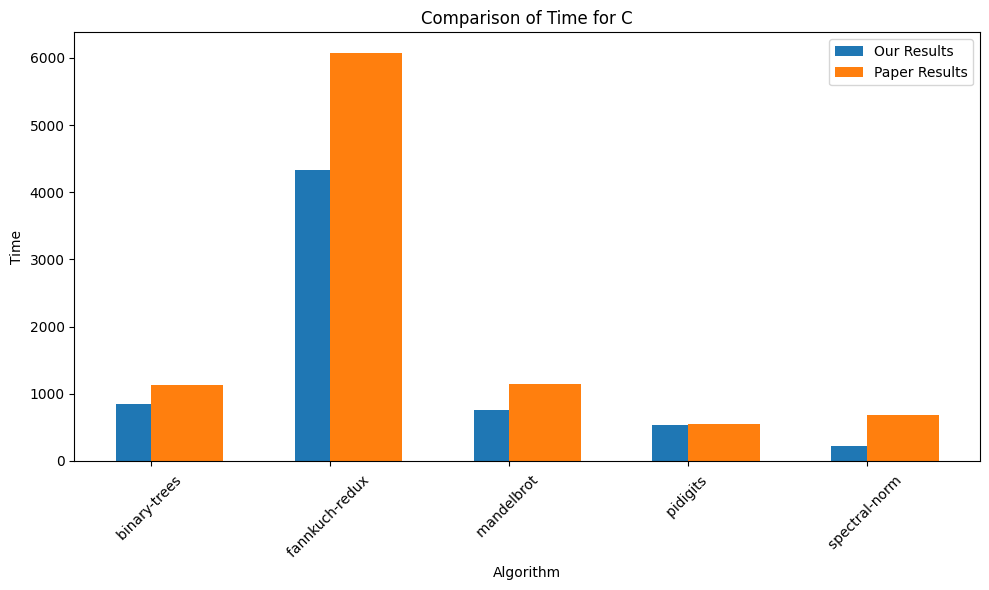

Language: Java
Difference in Time between paper and our results
   Algorithm: binary-trees 
      Our mean: 2103.062
      Paper mean: 3306
      Difference: -1202.938
   Algorithm: fannkuch-redux 
      Our mean: 6230.903
      Paper mean: 8241
      Difference: -2010.0969999999998
   Algorithm: mandelbrot 
      Our mean: 1984.895
      Paper mean: 3657
      Difference: -1672.105
   Algorithm: spectral-norm 
      Our mean: 752.6828
      Paper mean: 1659
      Difference: -906.3172


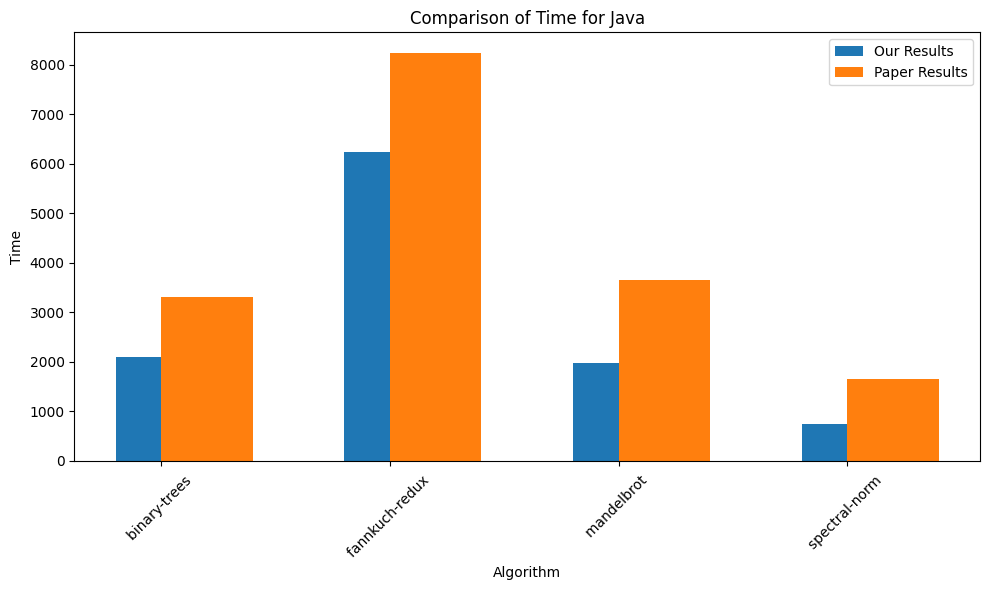

Language: JavaScript
Difference in Time between paper and our results
   Algorithm: binary-trees 
      Our mean: 13348.34
      Paper mean: 21349
      Difference: -8000.66
   Algorithm: fannkuch-redux 
      Our mean: 29182.920000000002
      Paper mean: 33663
      Difference: -4480.079999999998
   Algorithm: mandelbrot 
      Our mean: 3646.5449999999996
      Paper mean: 8278
      Difference: -4631.455
   Algorithm: spectral-norm 
      Our mean: 2564.517
      Paper mean: 5048
      Difference: -2483.483


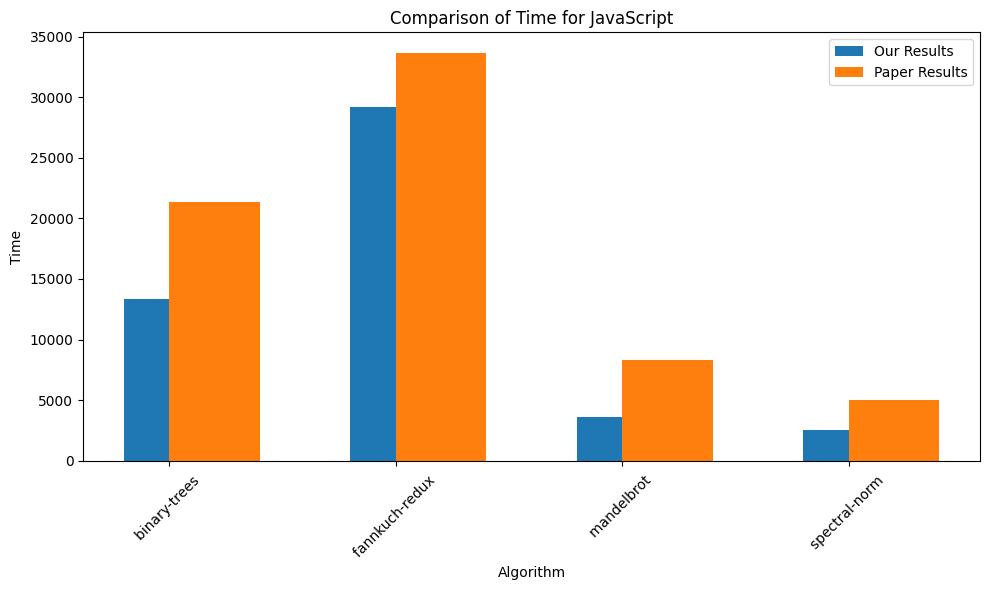

Language: Python
Difference in Time between paper and our results
   Algorithm: binary-trees 
      Our mean: 23754.23
      Paper mean: 45003
      Difference: -21248.77
   Algorithm: fannkuch-redux 
      Our mean: 209302.3
      Paper mean: 279544
      Difference: -70241.70000000001
   Algorithm: mandelbrot 
      Our mean: 117835.0
      Paper mean: 163332
      Difference: -45497.0
   Algorithm: pidigits 
      Our mean: 87.523
      Paper mean: 1191
      Difference: -1103.477
   Algorithm: spectral-norm 
      Our mean: 65749.01
      Paper mean: 137738
      Difference: -71988.99


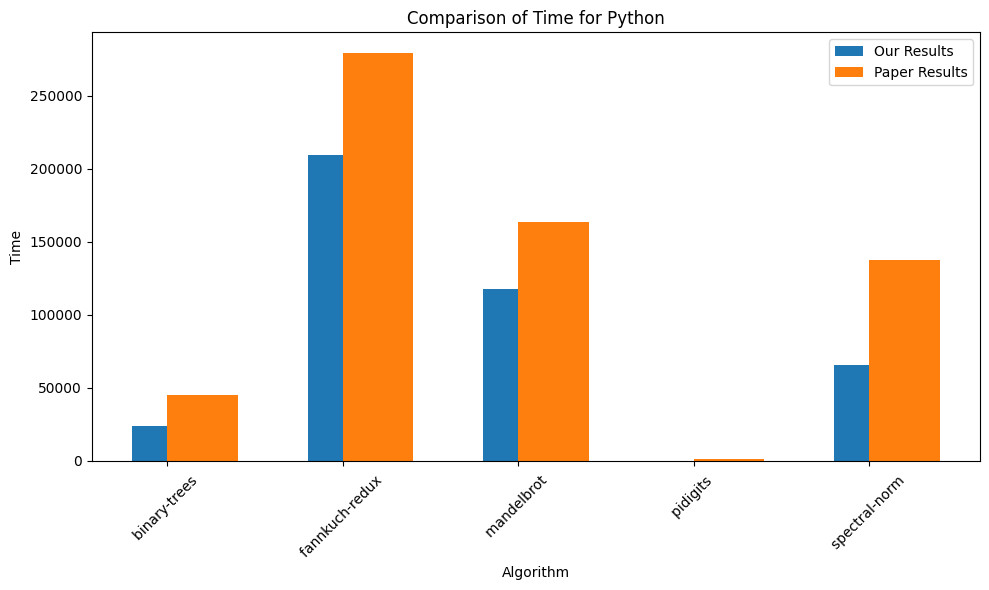

Language: Rust
Difference in Time between paper and our results
   Algorithm: binary-trees 
      Our mean: 935.0758
      Paper mean: 1263
      Difference: -327.92420000000004
   Algorithm: fannkuch-redux 
      Our mean: 5243.518
      Paper mean: 6628
      Difference: -1384.482
   Algorithm: mandelbrot 
      Our mean: 873.8617
      Paper mean: 1179
      Difference: -305.13829999999996
   Algorithm: pidigits 
      Our mean: 635.897
      Paper mean: 559
      Difference: 76.89700000000005
   Algorithm: spectral-norm 
      Our mean: 386.48560000000003
      Paper mean: 677
      Difference: -290.51439999999997


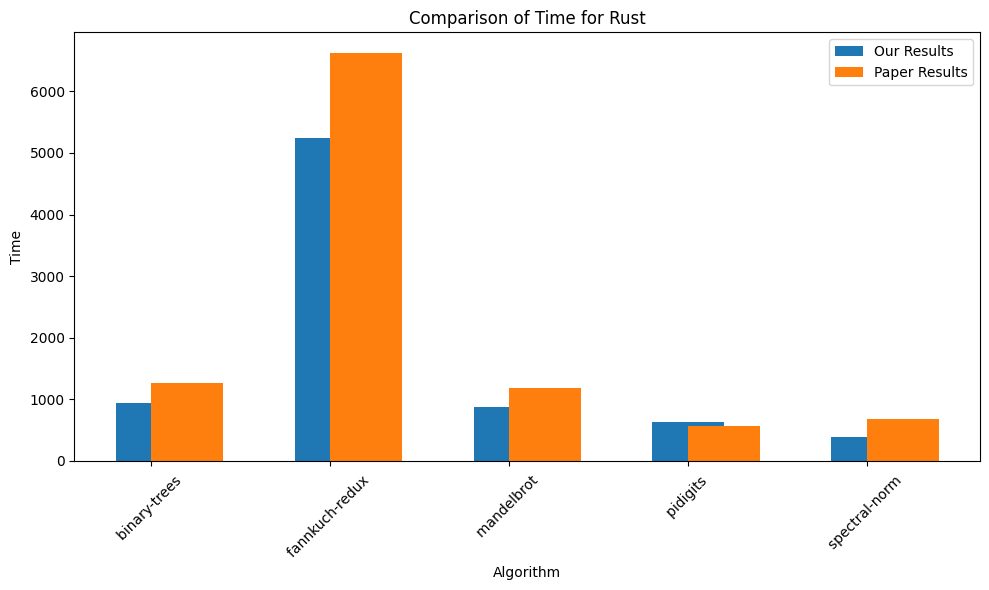

In [29]:
plot_results("Time", "MeanTime", mean_values)

Language: C
Difference in Mean CPU between paper and our results
   Algorithm: binary-trees 
      Our mean: 39.73258590698242
      Paper mean: 36.060001373291016
      Difference: 3.6725845336914062
   Algorithm: fannkuch-redux 
      Our mean: 227.45474243164062
      Paper mean: 201.11000061035156
      Difference: 26.344741821289062
   Algorithm: mandelbrot 
      Our mean: 40.457672119140625
      Paper mean: 32.599998474121094
      Difference: 7.857673645019531
   Algorithm: pidigits 
      Our mean: 14.056604385375977
      Paper mean: 6.190000057220459
      Difference: 7.866604328155518
   Algorithm: spectral-norm 
      Our mean: 12.197748184204102
      Paper mean: 20.020000457763672
      Difference: -7.82225227355957


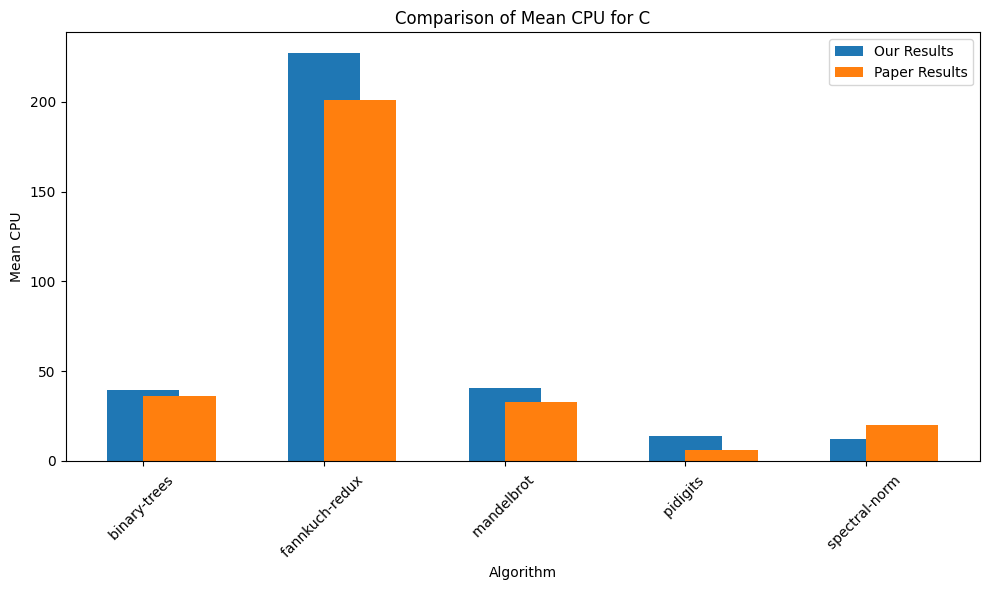

Language: Java
Difference in Mean CPU between paper and our results
   Algorithm: binary-trees 
      Our mean: 100.18885803222656
      Paper mean: 96.08999633789062
      Difference: 4.0988616943359375
   Algorithm: fannkuch-redux 
      Our mean: 363.1236877441406
      Paper mean: 291.4599914550781
      Difference: 71.6636962890625
   Algorithm: mandelbrot 
      Our mean: 106.51457214355469
      Paper mean: 105.33999633789062
      Difference: 1.1745758056640625
   Algorithm: spectral-norm 
      Our mean: 29.02472496032715
      Paper mean: 37.15999984741211
      Difference: -8.135274887084961


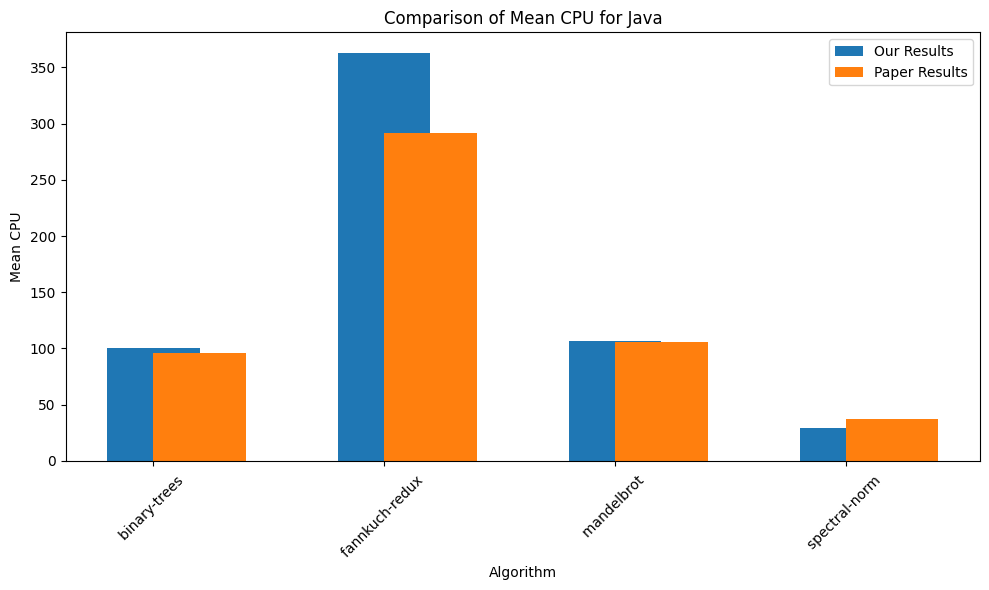

Language: JavaScript
Difference in Mean CPU between paper and our results
   Algorithm: binary-trees 
      Our mean: 405.4247741699219
      Paper mean: 238.69000244140625
      Difference: 166.73477172851562
   Algorithm: fannkuch-redux 
      Our mean: 734.0860595703125
      Paper mean: 332.57000732421875
      Difference: 401.51605224609375
   Algorithm: mandelbrot 
      Our mean: 183.53587341308594
      Paper mean: 211.33999633789062
      Difference: -27.804122924804688
   Algorithm: spectral-norm 
      Our mean: 62.51512908935547
      Paper mean: 39.25
      Difference: 23.26512908935547


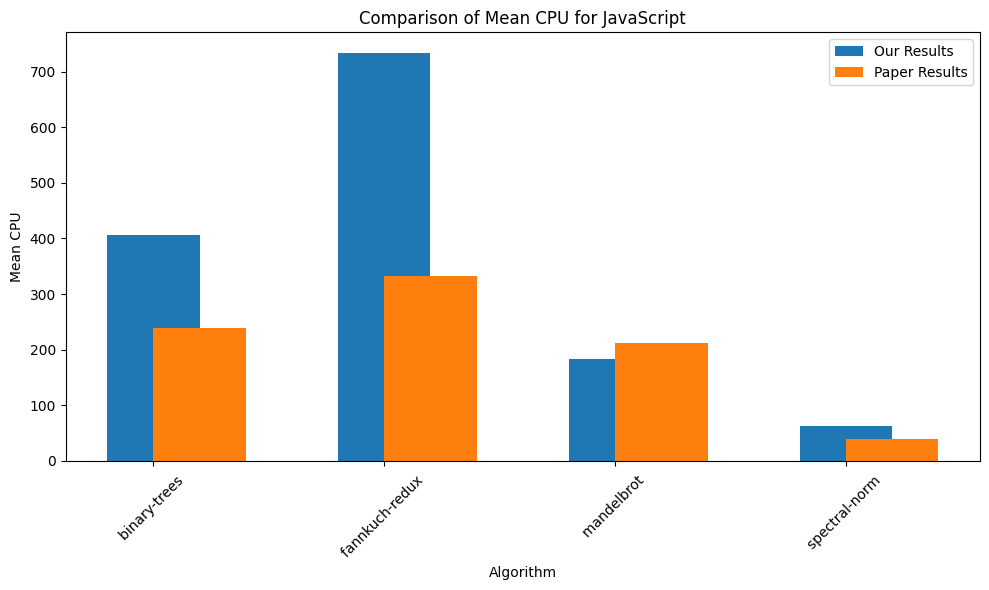

Language: Python
Difference in Mean CPU between paper and our results
   Algorithm: binary-trees 
      Our mean: 1033.444091796875
      Paper mean: 1666.0899658203125
      Difference: -632.6458740234375
   Algorithm: fannkuch-redux 
      Our mean: 10147.607421875
      Paper mean: 12108.7197265625
      Difference: -1961.1123046875
   Algorithm: mandelbrot 
      Our mean: 5108.70068359375
      Paper mean: 7395.52001953125
      Difference: -2286.8193359375
   Algorithm: pidigits 
      Our mean: 2.1325621604919434
      Paper mean: 14.699999809265137
      Difference: -12.567438125610352
   Algorithm: spectral-norm 
      Our mean: 2872.61376953125
      Paper mean: 6077.240234375
      Difference: -3204.62646484375


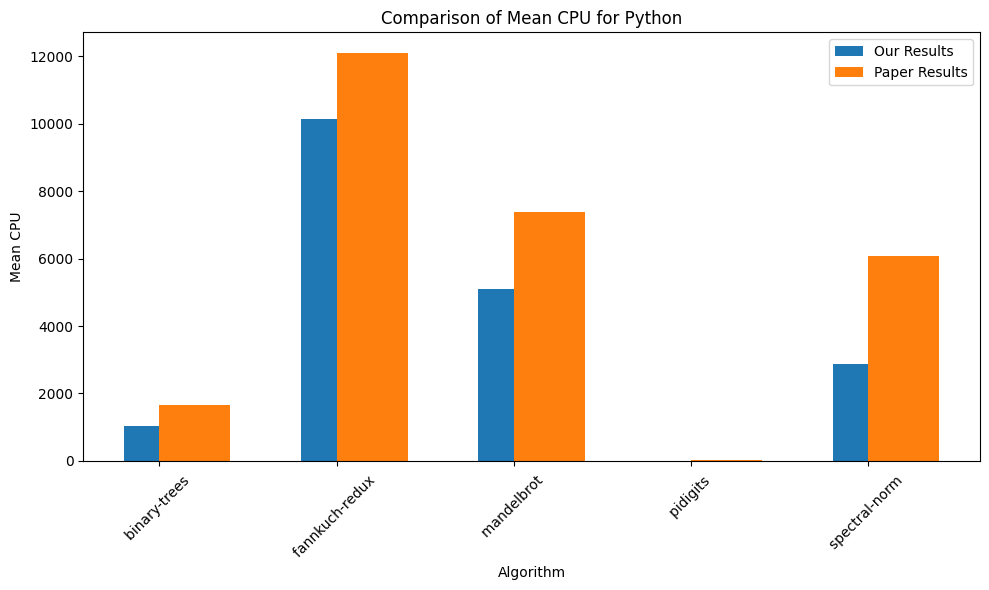

Language: Rust
Difference in Mean CPU between paper and our results
   Algorithm: binary-trees 
      Our mean: 29.526575088500977
      Paper mean: 44.459999084472656
      Difference: -14.93342399597168
   Algorithm: fannkuch-redux 
      Our mean: 162.47525024414062
      Paper mean: 222.2899932861328
      Difference: -59.81474304199219
   Algorithm: mandelbrot 
      Our mean: 28.471826553344727
      Paper mean: 38.2400016784668
      Difference: -9.76817512512207
   Algorithm: pidigits 
      Our mean: 8.63323974609375
      Paper mean: 6.75
      Difference: 1.88323974609375
   Algorithm: spectral-norm 
      Our mean: 14.282427787780762
      Paper mean: 22.729999542236328
      Difference: -8.447571754455566


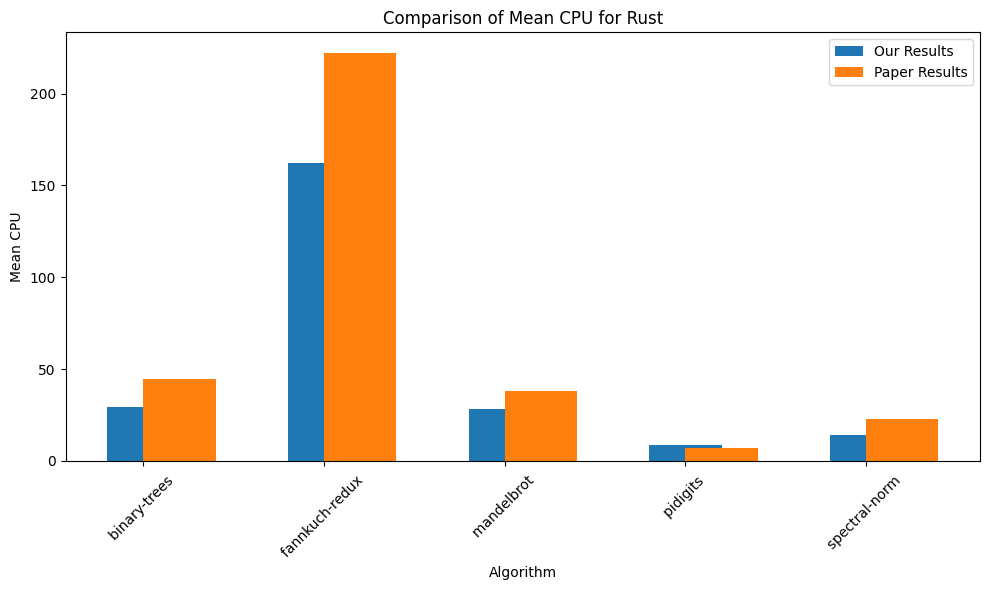

In [30]:
plot_results("Mean CPU", "MeanCPU", mean_values)

Language: C
Difference in Sigma Time between paper and our results
   Algorithm: binary-trees 
      Our mean: 10.046382904052734
      Paper mean: 5.76
      Difference: 4.286382904052735
   Algorithm: fannkuch-redux 
      Our mean: 101.51354217529297
      Paper mean: 7.43
      Difference: 94.08354217529296
   Algorithm: mandelbrot 
      Our mean: 4.1737542152404785
      Paper mean: 0.31
      Difference: 3.8637542152404785
   Algorithm: pidigits 
      Our mean: 7.222633361816406
      Paper mean: 1.76
      Difference: 5.4626333618164065
   Algorithm: spectral-norm 
      Our mean: 41.16210174560547
      Paper mean: 13.69
      Difference: 27.47210174560547


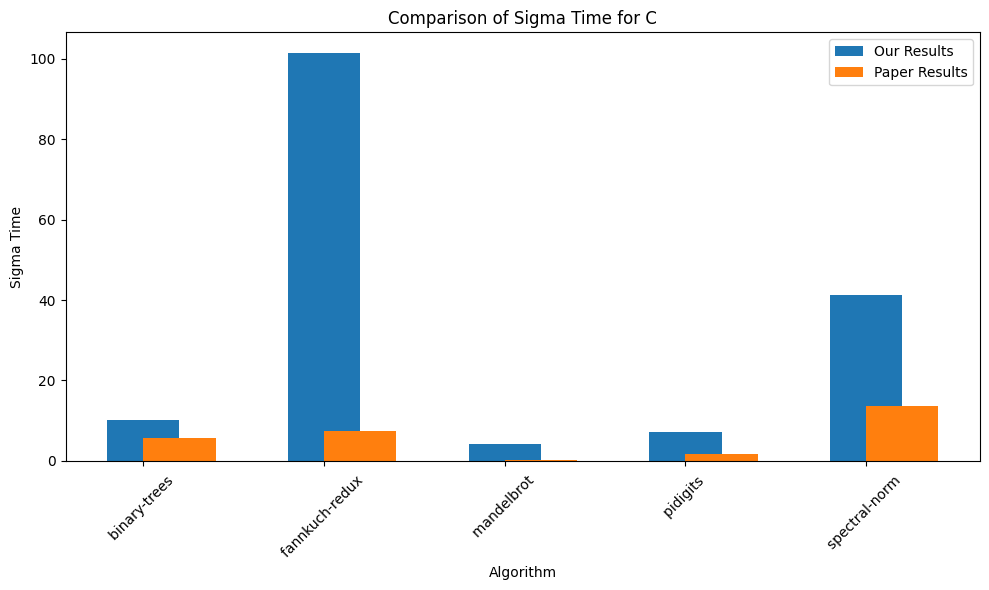

Language: Java
Difference in Sigma Time between paper and our results
   Algorithm: binary-trees 
      Our mean: 29.343114852905273
      Paper mean: 33.58
      Difference: -4.236885147094725
   Algorithm: fannkuch-redux 
      Our mean: 239.97039794921875
      Paper mean: 46.92
      Difference: 193.05039794921873
   Algorithm: mandelbrot 
      Our mean: 27.706865310668945
      Paper mean: 13.85
      Difference: 13.856865310668946
   Algorithm: spectral-norm 
      Our mean: 4.730514049530029
      Paper mean: 41.58
      Difference: -36.84948595046997


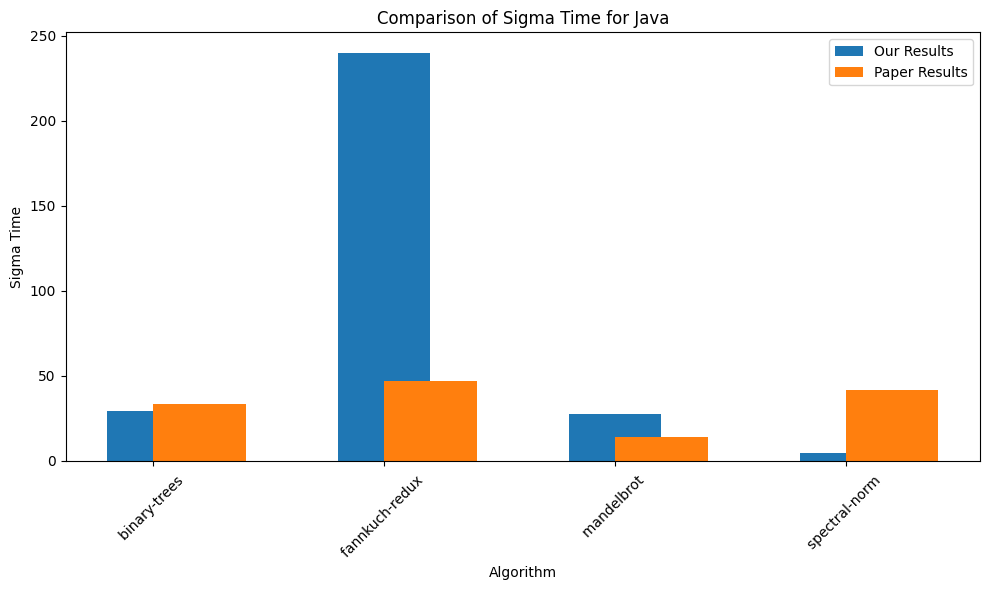

Language: JavaScript
Difference in Sigma Time between paper and our results
   Algorithm: binary-trees 
      Our mean: 503.5707702636719
      Paper mean: 200.89
      Difference: 302.6807702636719
   Algorithm: fannkuch-redux 
      Our mean: 517.5174560546875
      Paper mean: 17.53
      Difference: 499.9874560546875
   Algorithm: mandelbrot 
      Our mean: 102.9699935913086
      Paper mean: 76.26
      Difference: 26.70999359130859
   Algorithm: spectral-norm 
      Our mean: 54.499359130859375
      Paper mean: 23.21
      Difference: 31.289359130859374


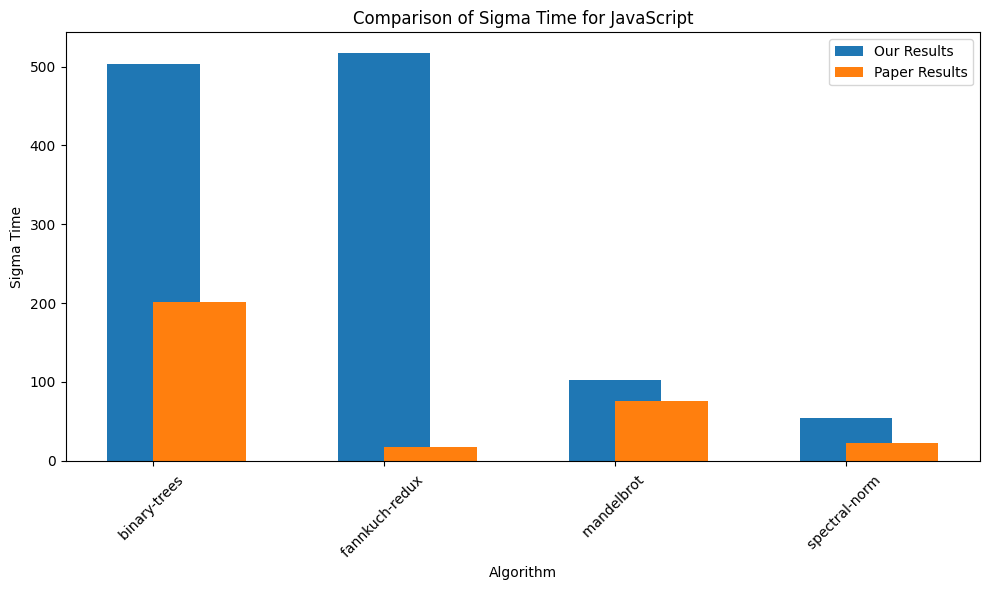

Language: Python
Difference in Sigma Time between paper and our results
   Algorithm: binary-trees 
      Our mean: 255.77919006347656
      Paper mean: 620.39
      Difference: -364.6108099365234
   Algorithm: fannkuch-redux 
      Our mean: 9289.5908203125
      Paper mean: 1432.46
      Difference: 7857.1308203125
   Algorithm: mandelbrot 
      Our mean: 667.9923706054688
      Paper mean: 2138.95
      Difference: -1470.957629394531
   Algorithm: pidigits 
      Our mean: 18.07140350341797
      Paper mean: 34.99
      Difference: -16.918596496582033
   Algorithm: spectral-norm 
      Our mean: 687.4141845703125
      Paper mean: 459.85
      Difference: 227.56418457031248


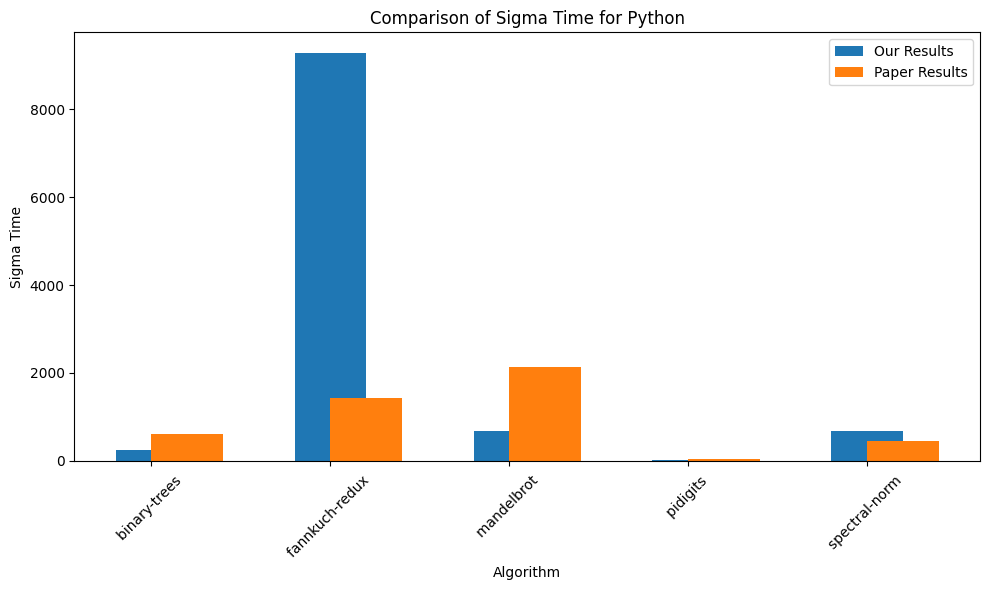

Language: Rust
Difference in Sigma Time between paper and our results
   Algorithm: binary-trees 
      Our mean: 33.318904876708984
      Paper mean: 37.6
      Difference: -4.281095123291017
   Algorithm: fannkuch-redux 
      Our mean: 53.198646545410156
      Paper mean: 31.21
      Difference: 21.988646545410155
   Algorithm: mandelbrot 
      Our mean: 7.430762767791748
      Paper mean: 9.84
      Difference: -2.409237232208252
   Algorithm: pidigits 
      Our mean: 3.758849620819092
      Paper mean: 22.12
      Difference: -18.36115037918091
   Algorithm: spectral-norm 
      Our mean: 7.318553447723389
      Paper mean: 7.47
      Difference: -0.15144655227661108


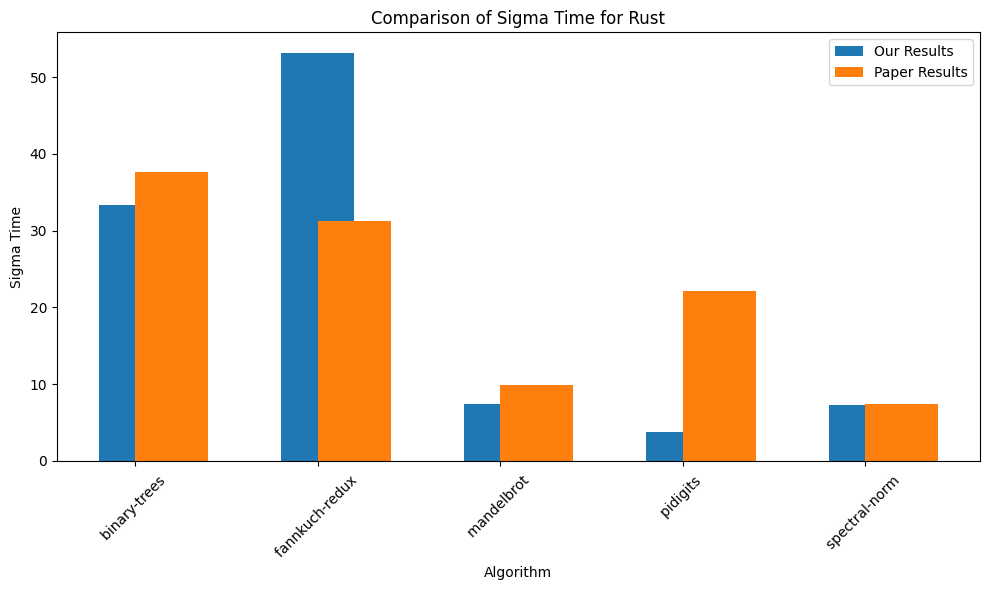

In [31]:
plot_results("Sigma Time", "SigmaTime", sigma_values)

Language: C
Difference in Sigma CPU between paper and our results
   Algorithm: binary-trees 
      Our mean: 1.0265741348266602
      Paper mean: 0.07999999821186066
      Difference: 0.9465741515159607
   Algorithm: fannkuch-redux 
      Our mean: 8.759592056274414
      Paper mean: 1.2899999618530273
      Difference: 7.469592094421387
   Algorithm: mandelbrot 
      Our mean: 1.3358711004257202
      Paper mean: 0.03999999910593033
      Difference: 1.2958711385726929
   Algorithm: pidigits 
      Our mean: 0.687075674533844
      Paper mean: 0.07999999821186066
      Difference: 0.6070756912231445
   Algorithm: spectral-norm 
      Our mean: 1.7796779870986938
      Paper mean: 0.03999999910593033
      Difference: 1.7396780252456665


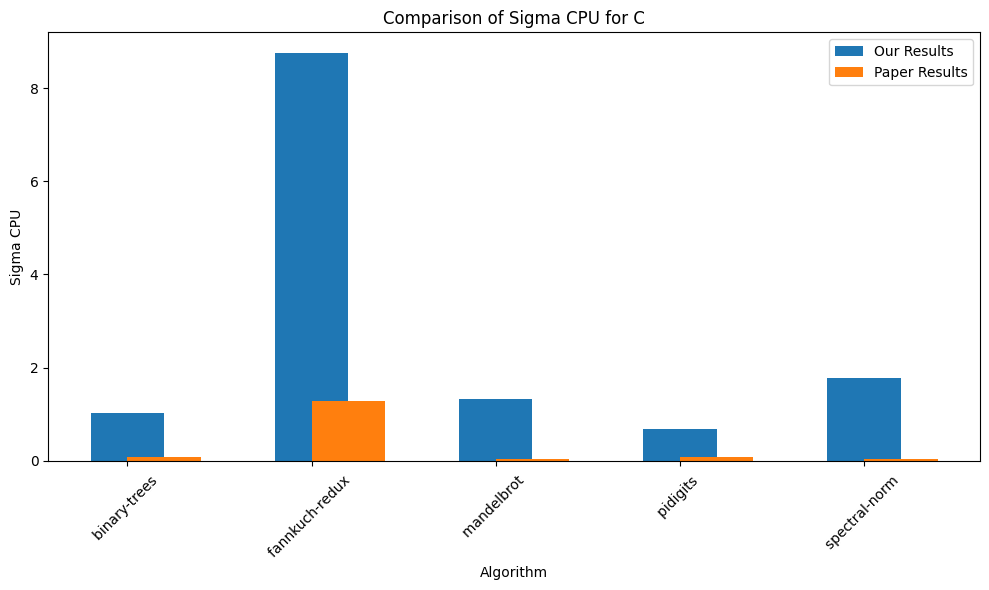

Language: Java
Difference in Sigma CPU between paper and our results
   Algorithm: binary-trees 
      Our mean: 1.964802622795105
      Paper mean: 0.8500000238418579
      Difference: 1.114802598953247
   Algorithm: fannkuch-redux 
      Our mean: 18.986305236816406
      Paper mean: 2.9700000286102295
      Difference: 16.016305923461914
   Algorithm: mandelbrot 
      Our mean: 1.487745761871338
      Paper mean: 0.27000001072883606
      Difference: 1.2177457809448242
   Algorithm: spectral-norm 
      Our mean: 0.22210107743740082
      Paper mean: 0.8600000143051147
      Difference: -0.6378989219665527


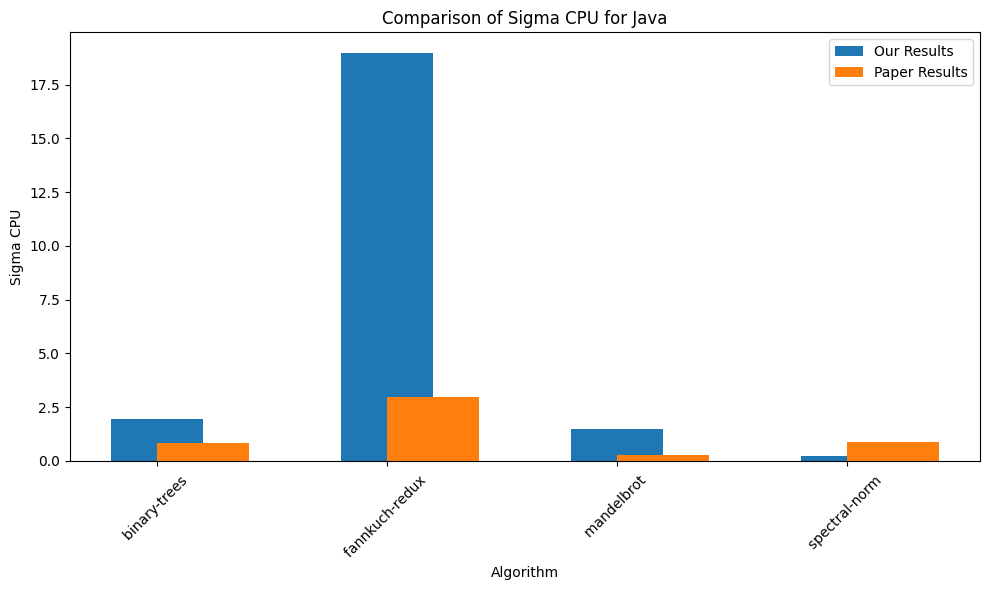

Language: JavaScript
Difference in Sigma CPU between paper and our results
   Algorithm: binary-trees 
      Our mean: 22.060823440551758
      Paper mean: 2.259999990463257
      Difference: 19.800823211669922
   Algorithm: fannkuch-redux 
      Our mean: 51.84796142578125
      Paper mean: 0.2800000011920929
      Difference: 51.567962646484375
   Algorithm: mandelbrot 
      Our mean: 5.324188709259033
      Paper mean: 0.33000001311302185
      Difference: 4.9941887855529785
   Algorithm: spectral-norm 
      Our mean: 3.015972137451172
      Paper mean: 0.10000000149011612
      Difference: 2.9159722328186035


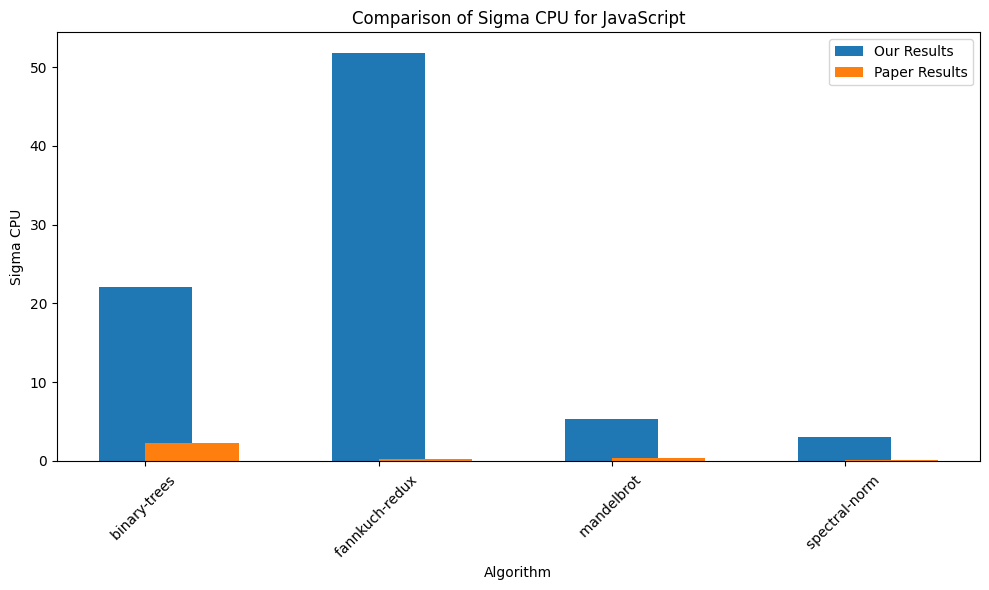

Language: Python
Difference in Sigma CPU between paper and our results
   Algorithm: binary-trees 
      Our mean: 45.13980484008789
      Paper mean: 10.25
      Difference: 34.88980484008789
   Algorithm: fannkuch-redux 
      Our mean: 1134.0577392578125
      Paper mean: 105.72000122070312
      Difference: 1028.3377685546875
   Algorithm: mandelbrot 
      Our mean: 59.433536529541016
      Paper mean: 48.130001068115234
      Difference: 11.303535461425781
   Algorithm: pidigits 
      Our mean: 0.4086762070655823
      Paper mean: 0.23000000417232513
      Difference: 0.17867620289325714
   Algorithm: spectral-norm 
      Our mean: 87.23429870605469
      Paper mean: 47.279998779296875
      Difference: 39.95429992675781


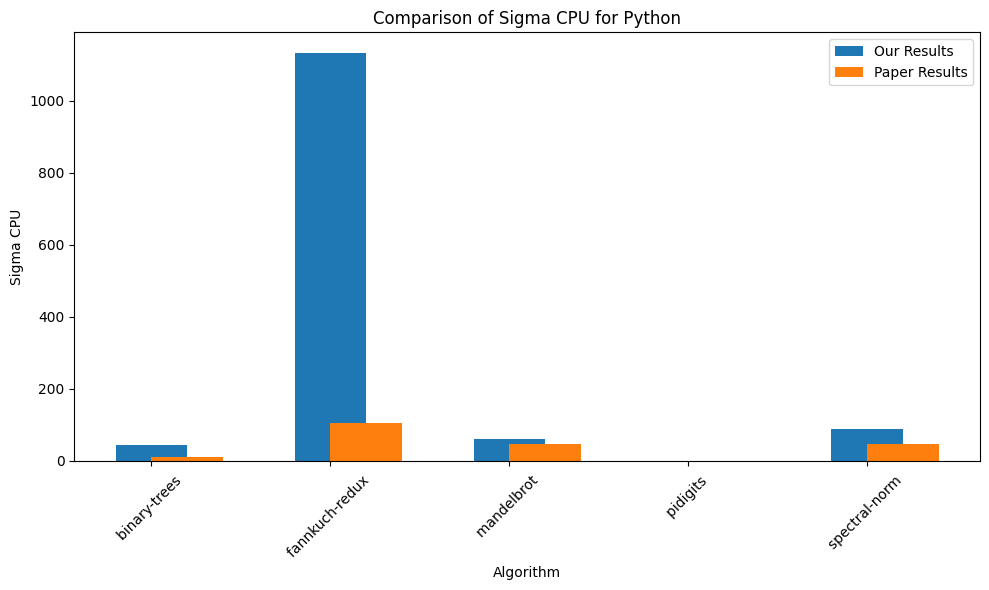

Language: Rust
Difference in Sigma CPU between paper and our results
   Algorithm: binary-trees 
      Our mean: 0.7811538577079773
      Paper mean: 0.10999999940395355
      Difference: 0.6711538434028625
   Algorithm: fannkuch-redux 
      Our mean: 2.115812063217163
      Paper mean: 1.3200000524520874
      Difference: 0.7958120107650757
   Algorithm: mandelbrot 
      Our mean: 0.5912591814994812
      Paper mean: 0.03999999910593033
      Difference: 0.5512591600418091
   Algorithm: pidigits 
      Our mean: 0.8590549826622009
      Paper mean: 0.14000000059604645
      Difference: 0.7190549969673157
   Algorithm: spectral-norm 
      Our mean: 0.1765243411064148
      Paper mean: 0.07999999821186066
      Difference: 0.09652434289455414


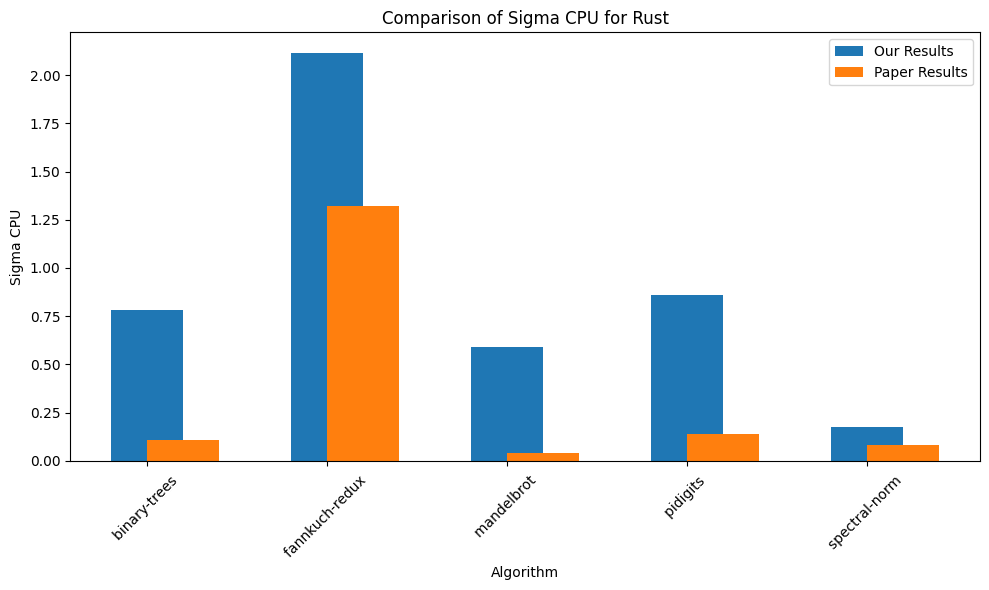

In [32]:
plot_results("Sigma CPU", "SigmaCPU", sigma_values)